### PCA and LDA are used for dimensionality reduction. Write python code using sklearn library to compare the performance of PCA with LDA for given dataset. The code should also include 1. Suitable methods of data exploration to describe the data. 2. Relevant plot/image to visualize the obtained results. Provide conceptual interpretation of the results. Use winequality-red dataset for the experimentation.

# Import Packages

In [58]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#from sklearn.neighbors import KNeighborsClassifier
from numpy import percentile
from sklearn.decomposition import PCA
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

# Loading Wine Quality - Red Dataset

In [3]:
wd = pd.read_csv("winequality-red.csv")
wd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality(class)        1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# i. Data Exploration

### Displaying the first 10 rows of the dataset

In [4]:
wd.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality(class)
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


### Length of the dataset

In [5]:
len(wd)

1599

### Statistical Analysis of the dataset

In [6]:
wd.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality(class)
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Bar Chart

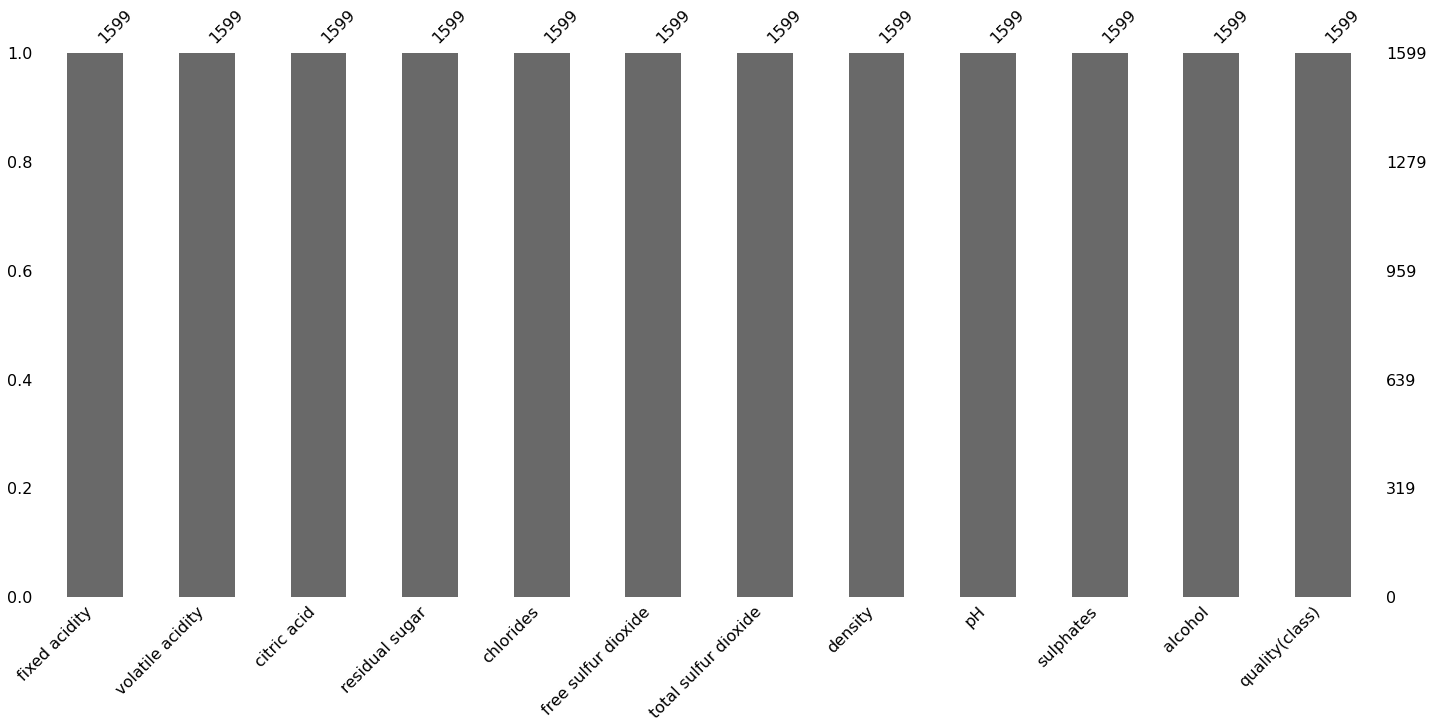

In [7]:
p=msno.bar(wd)

### Count of each target class
* insights are :
* 1. 1599 rows
* 2. no missing data
* 3. 6 unique target values
* 4. class imabalnce exists (not equal values for all the classes)

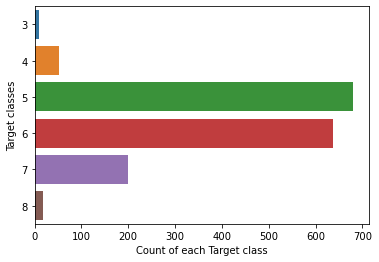

In [11]:
sns.countplot(y=wd['quality(class)'] ,data=wd)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

### Using Heat Map to Visualize the dataset

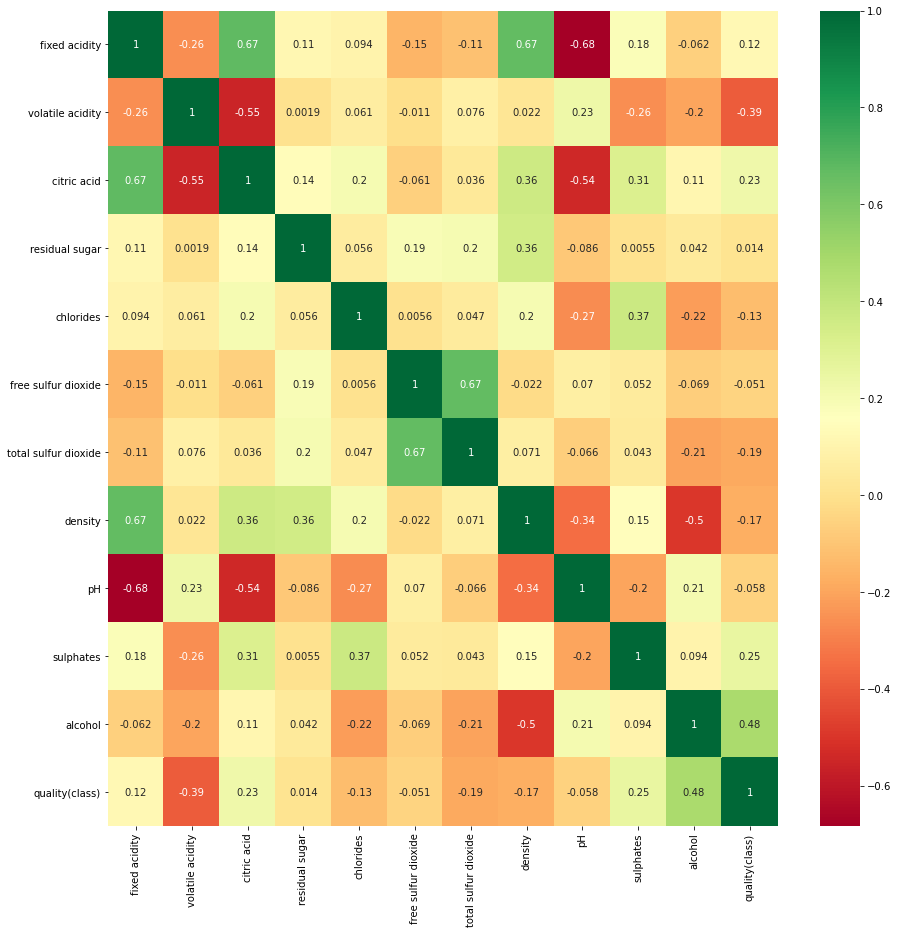

In [12]:
plt.figure(figsize=(15,15))
p=sns.heatmap(wd.corr(), annot=True,cmap='RdYlGn') 

### Five number summary for Attribute 1 : Fixed Acidity

In [15]:
#5 number summary for fixed acidity
p_quartiles = percentile(wd['fixed acidity'], [25, 50, 75])
p_data_min, p_data_max = wd['fixed acidity'].min(), wd['fixed acidity'].max()
print('The 5 number summary for Fixed Acidity : ')
print('Minimum    : %.3f' % p_data_min)
print('Quartile 1 : %.3f' % p_quartiles[0])
print('Quartile 2 : %.3f' % p_quartiles[1])
print('Quartile 3 : %.3f' % p_quartiles[2])
print('Maximum    : %.3f' % p_data_max)

The 5 number summary for Fixed Acidity : 
Minimum    : 4.600
Quartile 1 : 7.100
Quartile 2 : 7.900
Quartile 3 : 9.200
Maximum    : 15.900


### Box Plot for Attribute 1 : Fixed Acidity

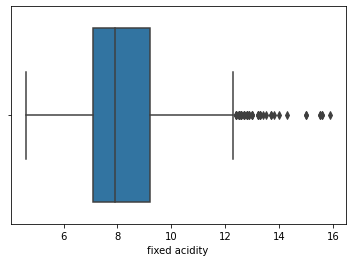

In [18]:
p_box_plot_1 = sns.boxplot(x=wd['fixed acidity'])

### Five number summary for Attribute 2 : Alcohol

In [17]:
#5 number summary for alcohol
p_quartiles = percentile(wd['alcohol'], [25, 50, 75])
p_data_min, p_data_max = wd['alcohol'].min(), wd['alcohol'].max()
print('The 5 number summary for Alcohol : ')
print('Minimum    : %.3f' % p_data_min)
print('Quartile 1 : %.3f' % p_quartiles[0])
print('Quartile 2 : %.3f' % p_quartiles[1])
print('Quartile 3 : %.3f' % p_quartiles[2])
print('Maximum    : %.3f' % p_data_max)

The 5 number summary for Alcohol : 
Minimum    : 8.400
Quartile 1 : 9.500
Quartile 2 : 10.200
Quartile 3 : 11.100
Maximum    : 14.900


### Box Plot for Attribute 2 : Alcohol

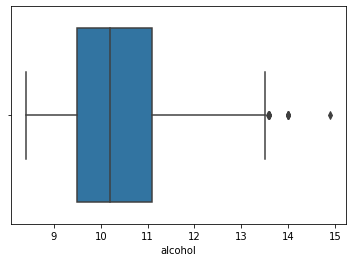

In [19]:
p_box_plot_2 = sns.boxplot(x=wd['alcohol'])

### Comparing the 2 box plots: Fixed Acidity vs Alcohol
* The box plot is not clear and difficult to understand just for 2 attributes as there are a total of 6 unique class values.

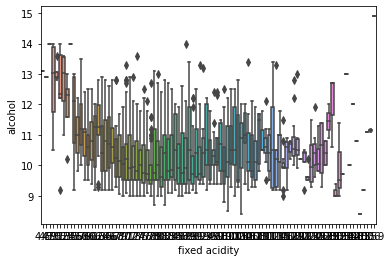

In [20]:
bp = sns.boxplot(x="fixed acidity", y="alcohol", data=wd)

### Histogram for all the attributes
* Comment : The total sulfur dioxide values are spread across a large range of values and have a frequency of 170 at most. The other attributes lie between a frequency of 0 to 40.

Text(0.5, 1.0, 'Side-by-Side Histogram with all the Attribute Values')

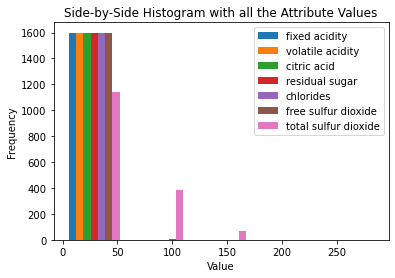

In [25]:
x1 = wd['fixed acidity']
x2 = wd['volatile acidity']
x3 = wd['citric acid']
x4 = wd['residual sugar']
x5 = wd['chlorides']
x6 = wd['free sulfur dioxide']
x7 = wd['total sulfur dioxide']
x8 = wd['density']
x9 = wd['pH']
x10 = wd['sulphates']
x11 = wd['alcohol']

names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

plt.hist([x1, x2, x3, x4, x5, x6, x7], bins = int(200/40), label=names)
plt.legend()
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Side-by-Side Histogram with all the Attribute Values')

# ii. Implementation

### Assigning x and y variables to attributes and target respectively

In [59]:
X = wd.drop(['quality(class)'],axis=1)
y = wd['quality(class)']

# 1. PCA

### Applying the PCA model on the dataset
* Only 2 Components are possible (reducing to 2 dimensions)

In [60]:
pca = PCA(n_components=2)
principalComponents_pca = pca.fit_transform(X)
wd_pc_df = pd.DataFrame(data = principalComponents_pca
             , columns = ['principal component 1', 'principal component 2'])
wd_pc_df.head()

,principal component 1,principal component 2
0,-13.224905,-2.023900
1,22.037724,4.408322
2,7.162673,-2.501461
3,13.430063,-1.951122
4,-13.224905,-2.023900


### Amount of information or variance each principal component holds after projecting the data to a lower dimensional subspace for PCA

In [70]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.94657698 0.0483683 ]


# 2. LDA

### Applying the LDA Model on the Dataset
* Only one component is possible (reducing to 1 dimension)

In [69]:
lda = LDA(n_components=1)
lda_object = lda.fit(X, y)
X_lda = lda_object.transform(X)
wd_ld_df = pd.DataFrame(data = X_lda
             , columns = ['principal component 1'])
wd_ld_df.head()

,principal component 1
0,-1.513044
1,-1.281523
2,-1.118752
3,0.025156
4,-1.513044


# iii. Visulaization of the Results

# 1. PCA

### A scatter plot is plotted between Principal component 1 and Principal component 2 obtained from performing PCA on the wine quality-red dataset for all the 6 target class values. 

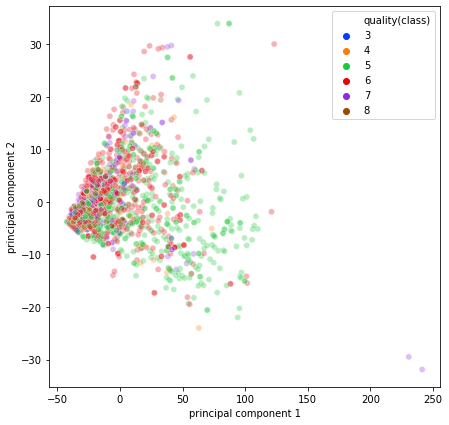

In [99]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue=y,
    palette=sns.color_palette("bright", 6),
    data=wd_pc_df,
    legend="full",
    alpha=0.3
)

### Heat Map of the 2 principal components

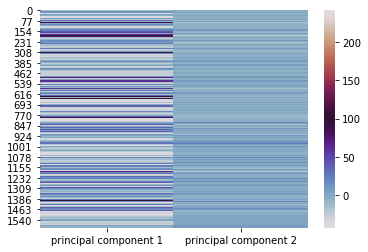

In [120]:
sns.heatmap(wd_pc_df,cmap='twilight')

# 2. LDA

### A scatter plot is plotted between Principal component 1 obtained from performing LDA on the wine quality-red dataset and all the 6 target class values. 

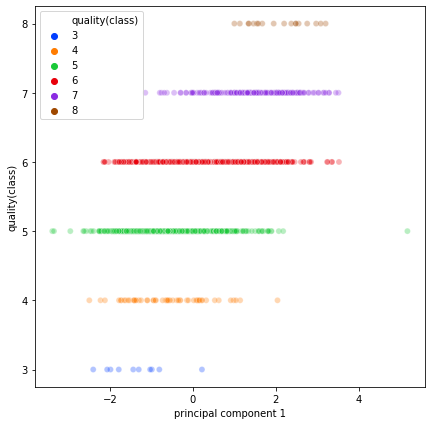

In [100]:
import seaborn as sns
plt.figure(figsize=(7,7))
sns.scatterplot(
    x="principal component 1", y=wd['quality(class)'],
    hue=y,
    palette=sns.color_palette("bright", 6),
    data=wd_ld_df,
    legend="full",
    alpha=0.3
)

### A heat map of the 1 principal component vs the 6 class values

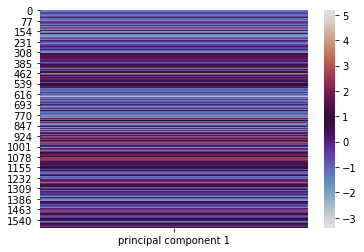

In [122]:
sns.heatmap(wd_ld_df,cmap='twilight')

# iv. Interpretation of the Results

### 1. The shape of the original dataset vs after PCA vs after LDA
* Interpretation for dimensions: The original numerical dataset had 12 dimenions. After applying PCA it is reduced to 2 dimensions and after applying LDA it is reduced to 1 dimenision

In [121]:
print("The shape of the original dataset           : ", wd.shape)
print("The shape of the original dataset after PCA : ", principalComponents_pca.shape)
print("The shape of the original dataset after LDA : ", X_lda.shape)

The shape of the original dataset           :  (1599, 12)
The shape of the original dataset after PCA :  (1599, 2)
The shape of the original dataset after LDA :  (1599, 1)


### 2. PCA vs LDA

### Type of Algorithm
* PCA is an Unsupervised Linear Transformation/Dimesionality Reduction Technique and ignores the class labels.
* LDA is a Supervised Linear Transformation/Dimesionality Reduction Technique and considers the class labels.


### Objective
* PCA as a technique that finds the directions of maximal variance.
* LDA attempts to find a feature subspace that maximizes class separability.

### The main idea
* The main idea of principal component analysis (PCA) is to reduce the dimensionality of a data set consisting of many variables correlated with each other, either heavily or lightly, while retaining the variation present in the dataset, up to the maximum extent.
* The main idea of linear discriminant analysis(LDA) is to maximize the separability between the two groups so that we can make the best decision to classify them. LDA is like PCA which helps in dimensionality reduction, but it focuses on maximizing the separability among known categories by creating a new linear axis and projecting the data points on that axis.

### The findings
* PCA transforms the variables into a new set of variables which is a combination of variables or attributes from our original dataset in such a way that maximum variation is retained. This combination of attributes is known as Principal Components (PCs).
* LDA doesn’t work on finding the principal component, it basically looks at what type of point/features/subspace gives more discrimination to separate the data.

### Performance and when to use them
* PCA Performs better in case where number of samples per class is less. PCA is used for unsupervised learning that naturally brings out hidden patterns.
* LDA Performs better for large datasets with multiple classes. LDA is used for supervised learning.

### 3. PCA and LDA with respect to the results obtained

* PCA aims to find the maximum variance in the data as a whole. The scatter plot is plotted between principal component 1 and 2. The class values are points. It reduced the dimensionality of the 11 variables that are corelated to each other. The plot is still hard to undersatnd as PCA tries to retain maximum variation while having to reduce the dimensions.
* LDA identifies components (linear combination of the varibles) that maximize the class separation or between class variance. The scatter plot plotted above for LDA clearly shows that the data is reduced to 1 Dimension and each and every class value has a line of points in that axis only. The plot is easy to understand as the class separation is maximum.

# ---------------------------------------------------------------------------------------------------------------